# High-Throughput Multi-Omics Phenotyping Simulation
# Proof-of-Concept: Testing AI-Generated Synthetic Organelle Genomes

# 1. IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")
np.random.seed(42)

# 2. SIMULATE SYNTHETIC MITOCHONDRIAL GENOME DATA

In [6]:
n_variants = 1000

data = pd.DataFrame({
    "Variant_ID": [f"MTG_{i+1}" for i in range(n_variants)],
    "ATP_Production": np.random.normal(loc=80, scale=15, size=n_variants),
    "OCR": np.random.normal(loc=150, scale=25, size=n_variants),
    "ROS": np.random.normal(loc=20, scale=5, size=n_variants),
    "Membrane_Potential": np.random.normal(loc=150, scale=30, size=n_variants)
})

# Clamp physiologically impossible values
data["ATP_Production"] = np.clip(data["ATP_Production"], 10, 150)
data["OCR"] = np.clip(data["OCR"], 50, 250)
data["ROS"] = np.clip(data["ROS"], 0, 80)
data["Membrane_Potential"] = np.clip(data["Membrane_Potential"], 50, 250)

# 3. CALCULATE PERFORMANCE SCORE

In [11]:
# High ATP & OCR = good, low ROS = good, stable membrane potential = good
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[["ATP_Production", "OCR", "ROS", "Membrane_Potential"]])
data[["ATP_scaled", "OCR_scaled", "ROS_scaled", "MP_scaled"]] = scaled

# Weighted score: prioritize energy, efficiency, and stability
weights = np.array([0.35, 0.25, -0.2, 0.2])  # ROS penalized

# Score calculation
data["Performance_Score"] = scaled.dot(weights)
data = data.sort_values("Performance_Score", ascending=False).reset_index(drop=True)

# 4. PCA FOR VISUALIZING VARIANT CLUSTERS

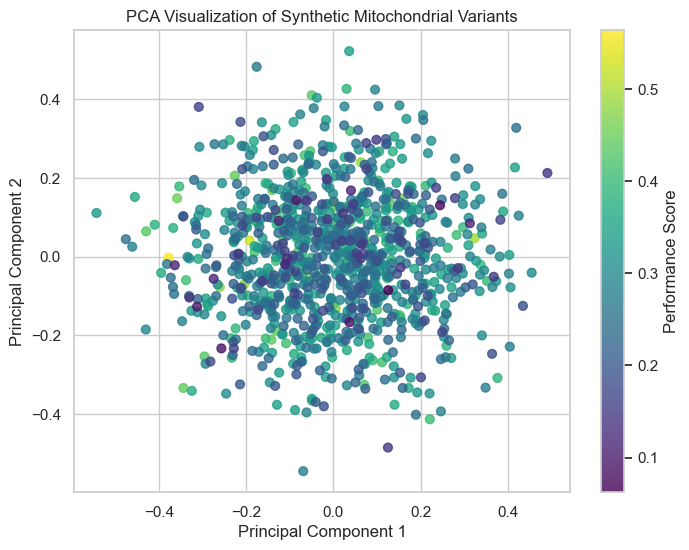

In [16]:
# PCA Visualization of Synthetic Mitochondrial Variants
plt.figure(figsize=(8,6))

# Create scatterplot manually to get a handle on the object
scatter = plt.scatter(
    data["PC1"],
    data["PC2"],
    c=data["Performance_Score"],
    cmap="viridis",
    s=40,
    alpha=0.8
)

# Add labels and colorbar
plt.title("PCA Visualization of Synthetic Mitochondrial Variants")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
cbar = plt.colorbar(scatter)
cbar.set_label("Performance Score")

plt.show()


# 5. TOP 10 SYNTHETIC VARIANTS

In [19]:
print("Top 10 High-Performing Synthetic Mitochondrial Designs:")
display(data.head(10)[["Variant_ID", "ATP_Production", "OCR", "ROS", "Membrane_Potential", "Performance_Score"]])

Top 10 High-Performing Synthetic Mitochondrial Designs:


,Variant_ID,ATP_Production,OCR,ROS,Membrane_Potential,Performance_Score
0,MTG_210,137.790972,193.739419,19.996457,163.536760,0.563776
1,MTG_881,117.903986,174.121291,8.808844,159.051000,0.525963
2,MTG_876,106.918368,184.892095,15.451583,185.756980,0.497979
3,MTG_708,106.321913,197.497048,20.119515,190.566080,0.494880
4,MTG_625,103.897799,196.832444,22.048814,206.933011,0.492389
5,MTG_479,126.183212,127.812696,13.306971,184.607710,0.479392
6,MTG_495,102.846861,188.552749,13.717466,165.344987,0.478496
7,MTG_492,102.199162,213.954982,16.551361,143.596297,0.477971
8,MTG_678,106.284057,188.032901,12.175986,145.492710,0.476390
9,MTG_388,108.142563,189.037780,15.378834,152.344292,0.473096


# 6. FEATURE IMPORTANCE (AI MODEL)

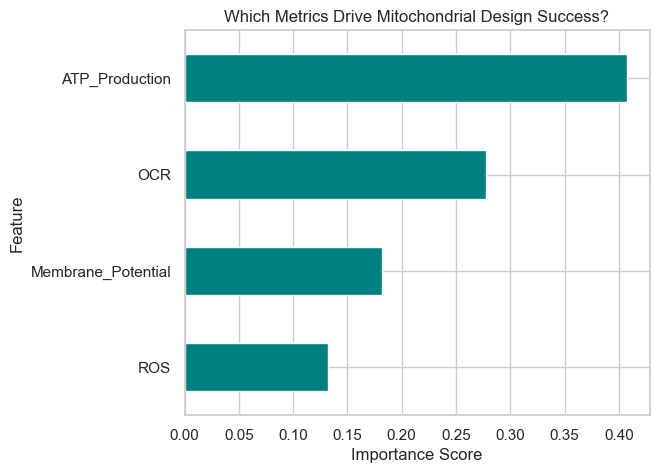

In [22]:

X = data[["ATP_Production", "OCR", "ROS", "Membrane_Potential"]]
y = data["Performance_Score"]
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X, y)

plt.figure(figsize=(6,5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Which Metrics Drive Mitochondrial Design Success?")
plt.show()


# 7. SUMMARY
*This simulation models high throughput testing of synthetic mitochondrial genomes.
We integrate ATP production, OCR, ROS levels, and membrane potential measurements.
An AI assisted scoring pipeline ranks thousands of designs simultaneously, mimicking robotics enabled Seahorse flux analyses and fluorescent imaging workflows.*

# 8. NON INTERACTIVE DASHBOARD, THRESHOLDS AND TOP DESIGNS


DASHBOARD SUMMARY:
Total variants screened: 1000
Variants meeting all thresholds: 10 (1.0 percent)

Mean metrics for pass vs fail:
              ATP_Production     OCR    ROS  Membrane_Potential  \
OVERALL_PASS                                                      
False                  80.07  151.43  20.08              149.34   
True                  102.51  185.15  14.92              159.16   

              Performance_Score  
OVERALL_PASS                     
False                      0.29  
True                       0.46  


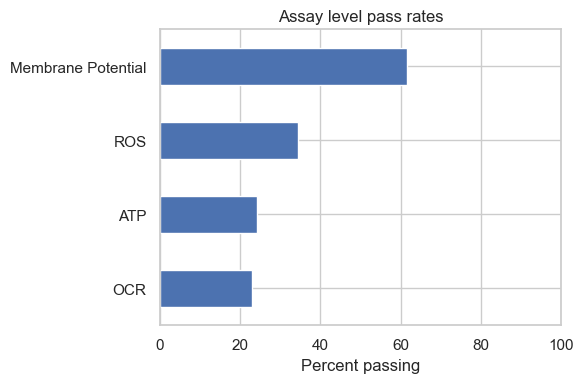

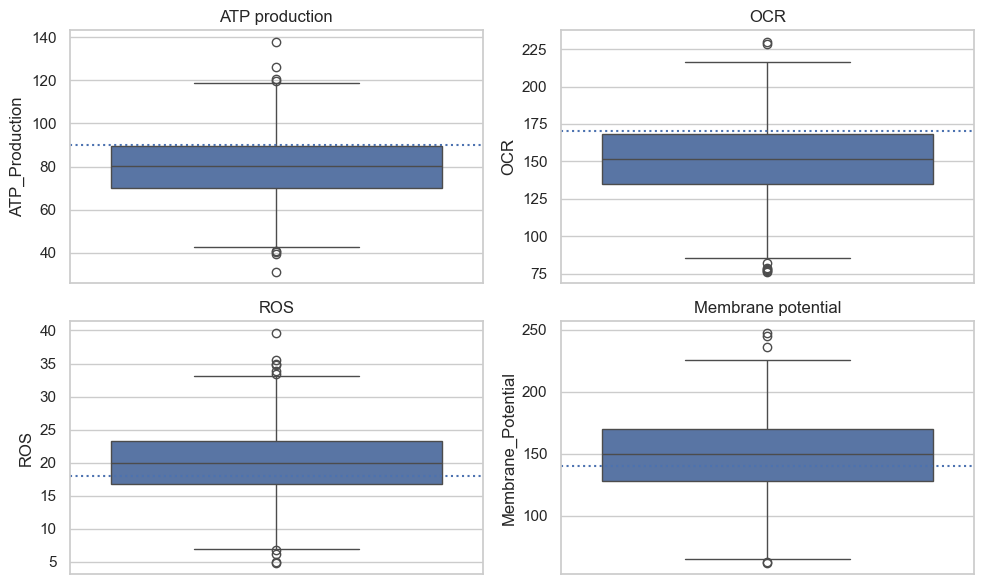


Top twenty designs meeting thresholds:


,Variant_ID,ATP_Production,OCR,ROS,Membrane_Potential,Performance_Score
1,MTG_881,117.903986,174.121291,8.808844,159.051000,0.525963
2,MTG_876,106.918368,184.892095,15.451583,185.756980,0.497979
6,MTG_495,102.846861,188.552749,13.717466,165.344987,0.478496
7,MTG_492,102.199162,213.954982,16.551361,143.596297,0.477971
8,MTG_678,106.284057,188.032901,12.175986,145.492710,0.476390
9,MTG_388,108.142563,189.037780,15.378834,152.344292,0.473096
22,MTG_136,103.249016,174.102179,17.131991,163.290064,0.434375
24,MTG_41,91.076999,192.098192,16.526434,168.306485,0.432585
70,MTG_294,92.744031,170.962269,15.958671,160.140704,0.398059
100,MTG_87,93.731032,175.757086,17.459299,148.302345,0.387695


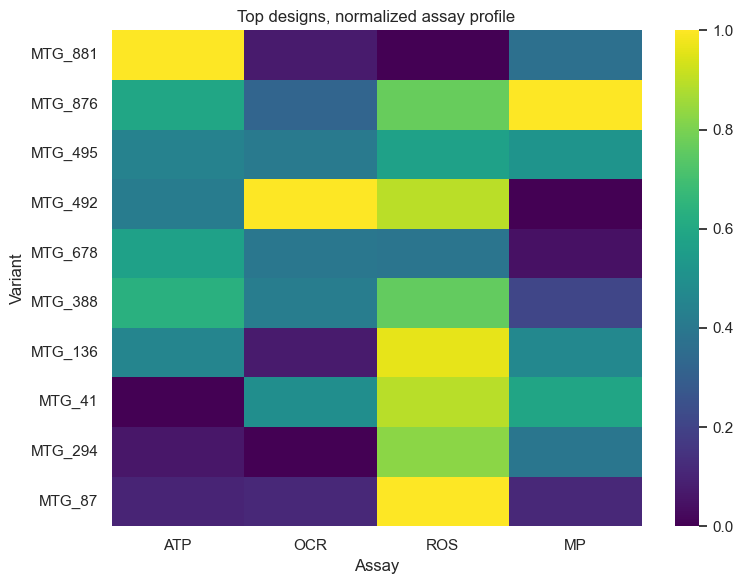

Report saved to: mito_test_top_designs.csv


In [33]:
# Define assay thresholds for a pass, tune these to your lab standards
THRESHOLDS = {
    "ATP_Production_min": 90.0,   # target ATP or higher
    "OCR_min": 170.0,             # respiratory capacity or higher
    "ROS_max": 18.0,              # oxidative stress at or below
    "Membrane_Potential_min": 140.0  # stable potential or higher
}

# Compute pass or fail per metric
data["PASS_ATP"] = data["ATP_Production"] >= THRESHOLDS["ATP_Production_min"]
data["PASS_OCR"] = data["OCR"] >= THRESHOLDS["OCR_min"]
data["PASS_ROS"] = data["ROS"] <= THRESHOLDS["ROS_max"]
data["PASS_MP"] = data["Membrane_Potential"] >= THRESHOLDS["Membrane_Potential_min"]

# Overall pass if all conditions are met
criteria_cols = ["PASS_ATP", "PASS_OCR", "PASS_ROS", "PASS_MP"]
data["OVERALL_PASS"] = data[criteria_cols].all(axis=1)

# KPI cards printed to console
n_total = len(data)
n_pass = int(data["OVERALL_PASS"].sum())
pass_pct = 100.0 * n_pass / n_total
print("\nDASHBOARD SUMMARY:")
print(f"Total variants screened: {n_total}")
print(f"Variants meeting all thresholds: {n_pass} ({pass_pct:.1f} percent)")

# Mean metrics for pass vs fail
summary_by_pass = data.groupby("OVERALL_PASS")[ ["ATP_Production", "OCR", "ROS", "Membrane_Potential", "Performance_Score"] ].mean().round(2)
print("\nMean metrics for pass vs fail:")
print(summary_by_pass)

# Bar plot, pass rates per metric
metric_pass_rates = pd.Series({
    "ATP": data["PASS_ATP"].mean()*100,
    "OCR": data["PASS_OCR"].mean()*100,
    "ROS": data["PASS_ROS"].mean()*100,
    "Membrane Potential": data["PASS_MP"].mean()*100
})
plt.figure(figsize=(6,4))
metric_pass_rates.sort_values().plot(kind="barh")
plt.xlabel("Percent passing")
plt.title("Assay level pass rates")
plt.xlim(0,100)
plt.tight_layout()
plt.show()

# Boxplots with threshold lines for quick QC
fig, axes = plt.subplots(2,2, figsize=(10,6))
sns.boxplot(y=data["ATP_Production"], ax=axes[0,0])
axes[0,0].axhline(THRESHOLDS["ATP_Production_min"], linestyle=":")
axes[0,0].set_title("ATP production")

sns.boxplot(y=data["OCR"], ax=axes[0,1])
axes[0,1].axhline(THRESHOLDS["OCR_min"], linestyle=":")
axes[0,1].set_title("OCR")

sns.boxplot(y=data["ROS"], ax=axes[1,0])
axes[1,0].axhline(THRESHOLDS["ROS_max"], linestyle=":")
axes[1,0].set_title("ROS")

sns.boxplot(y=data["Membrane_Potential"], ax=axes[1,1])
axes[1,1].axhline(THRESHOLDS["Membrane_Potential_min"], linestyle=":")
axes[1,1].set_title("Membrane potential")

plt.tight_layout()
plt.show()

# Select top designs that pass all thresholds, ranked by performance score
passing = data[data["OVERALL_PASS"]].copy()
passing_top = passing.sort_values("Performance_Score", ascending=False).head(20)

print("\nTop twenty designs meeting thresholds:")
display(passing_top[["Variant_ID", "ATP_Production", "OCR", "ROS", "Membrane_Potential", "Performance_Score"]])

# Heatmap of normalized metrics for top designs
norm_cols = ["ATP_Production", "OCR", "ROS", "Membrane_Potential"]
pass_norm = MinMaxScaler().fit_transform(passing_top[norm_cols])
pass_norm_df = pd.DataFrame(pass_norm, columns=["ATP", "OCR", "ROS", "MP"], index=passing_top["Variant_ID"])
plt.figure(figsize=(8,6))
sns.heatmap(pass_norm_df, cmap="viridis", annot=False)
plt.title("Top designs, normalized assay profile")
plt.ylabel("Variant")
plt.xlabel("Assay")
plt.tight_layout()
plt.show()

# Save a CSV report for records
report_path = "mito_test_top_designs.csv"
passing_top[["Variant_ID", "ATP_Production", "OCR", "ROS", "Membrane_Potential", "Performance_Score", "OVERALL_PASS"]].to_csv(report_path, index=False)
print(f"Report saved to: {report_path}")


# 9. NON INTERACTIVE DASHBOARD, THRESHOLDS AND TOP DESIGNS
#### Define assay thresholds for a pass, tune these to your lab standards


DASHBOARD SUMMARY:
Total variants screened: 1000
Variants meeting all thresholds: 10 (1.0 percent)

Mean metrics for pass vs fail:
              ATP_Production     OCR    ROS  Membrane_Potential  \
OVERALL_PASS                                                      
False                  80.07  151.43  20.08              149.34   
True                  102.51  185.15  14.92              159.16   

              Performance_Score  
OVERALL_PASS                     
False                      0.29  
True                       0.46  


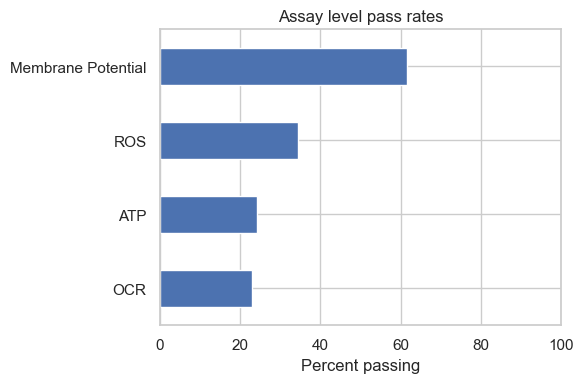

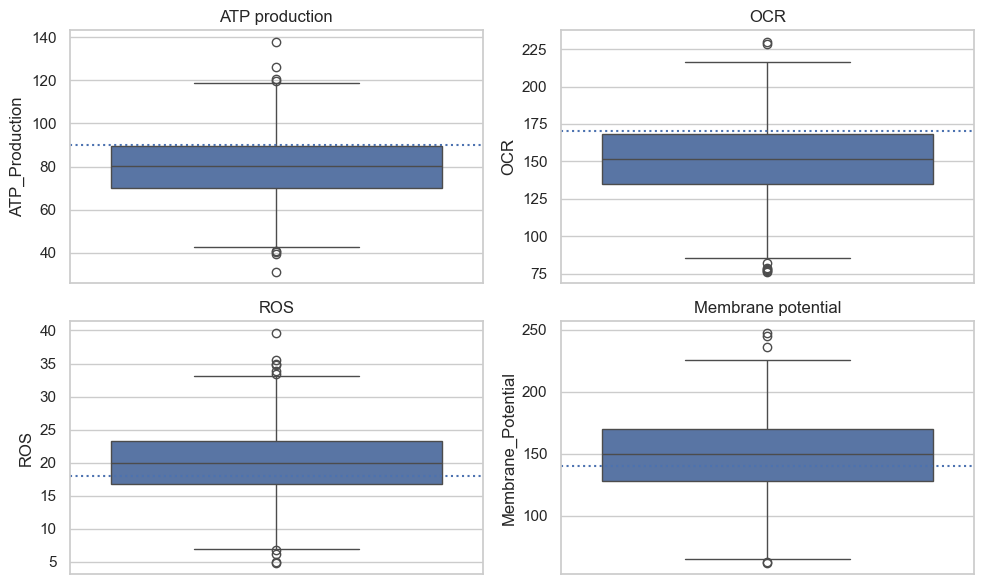


Top twenty designs meeting thresholds:


,Variant_ID,ATP_Production,OCR,ROS,Membrane_Potential,Performance_Score
1,MTG_881,117.903986,174.121291,8.808844,159.051000,0.525963
2,MTG_876,106.918368,184.892095,15.451583,185.756980,0.497979
6,MTG_495,102.846861,188.552749,13.717466,165.344987,0.478496
7,MTG_492,102.199162,213.954982,16.551361,143.596297,0.477971
8,MTG_678,106.284057,188.032901,12.175986,145.492710,0.476390
9,MTG_388,108.142563,189.037780,15.378834,152.344292,0.473096
22,MTG_136,103.249016,174.102179,17.131991,163.290064,0.434375
24,MTG_41,91.076999,192.098192,16.526434,168.306485,0.432585
70,MTG_294,92.744031,170.962269,15.958671,160.140704,0.398059
100,MTG_87,93.731032,175.757086,17.459299,148.302345,0.387695


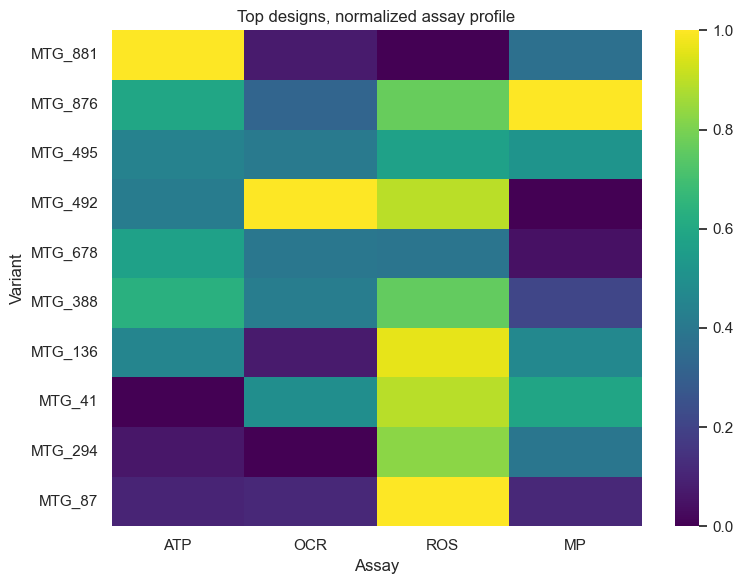

Report saved to: mito_test_top_designs.csv


In [36]:

THRESHOLDS = {
    "ATP_Production_min": 90.0,   # target ATP or higher
    "OCR_min": 170.0,             # respiratory capacity or higher
    "ROS_max": 18.0,              # oxidative stress at or below
    "Membrane_Potential_min": 140.0  # stable potential or higher
}

# Compute pass or fail per metric
data["PASS_ATP"] = data["ATP_Production"] >= THRESHOLDS["ATP_Production_min"]
data["PASS_OCR"] = data["OCR"] >= THRESHOLDS["OCR_min"]
data["PASS_ROS"] = data["ROS"] <= THRESHOLDS["ROS_max"]
data["PASS_MP"] = data["Membrane_Potential"] >= THRESHOLDS["Membrane_Potential_min"]

# Overall pass if all conditions are met
criteria_cols = ["PASS_ATP", "PASS_OCR", "PASS_ROS", "PASS_MP"]
data["OVERALL_PASS"] = data[criteria_cols].all(axis=1)

# KPI cards printed to console
n_total = len(data)
n_pass = int(data["OVERALL_PASS"].sum())
pass_pct = 100.0 * n_pass / n_total
print("\nDASHBOARD SUMMARY:")
print(f"Total variants screened: {n_total}")
print(f"Variants meeting all thresholds: {n_pass} ({pass_pct:.1f} percent)")

# Mean metrics for pass vs fail
summary_by_pass = data.groupby("OVERALL_PASS")[ ["ATP_Production", "OCR", "ROS", "Membrane_Potential", "Performance_Score"] ].mean().round(2)
print("\nMean metrics for pass vs fail:")
print(summary_by_pass)

# Bar plot, pass rates per metric
metric_pass_rates = pd.Series({
    "ATP": data["PASS_ATP"].mean()*100,
    "OCR": data["PASS_OCR"].mean()*100,
    "ROS": data["PASS_ROS"].mean()*100,
    "Membrane Potential": data["PASS_MP"].mean()*100
})
plt.figure(figsize=(6,4))
metric_pass_rates.sort_values().plot(kind="barh")
plt.xlabel("Percent passing")
plt.title("Assay level pass rates")
plt.xlim(0,100)
plt.tight_layout()
plt.show()

# Boxplots with threshold lines for quick QC
fig, axes = plt.subplots(2,2, figsize=(10,6))
sns.boxplot(y=data["ATP_Production"], ax=axes[0,0])
axes[0,0].axhline(THRESHOLDS["ATP_Production_min"], linestyle=":")
axes[0,0].set_title("ATP production")

sns.boxplot(y=data["OCR"], ax=axes[0,1])
axes[0,1].axhline(THRESHOLDS["OCR_min"], linestyle=":")
axes[0,1].set_title("OCR")

sns.boxplot(y=data["ROS"], ax=axes[1,0])
axes[1,0].axhline(THRESHOLDS["ROS_max"], linestyle=":")
axes[1,0].set_title("ROS")

sns.boxplot(y=data["Membrane_Potential"], ax=axes[1,1])
axes[1,1].axhline(THRESHOLDS["Membrane_Potential_min"], linestyle=":")
axes[1,1].set_title("Membrane potential")

plt.tight_layout()
plt.show()

# Select top designs that pass all thresholds, ranked by performance score
passing = data[data["OVERALL_PASS"]].copy()
passing_top = passing.sort_values("Performance_Score", ascending=False).head(20)

print("\nTop twenty designs meeting thresholds:")
display(passing_top[["Variant_ID", "ATP_Production", "OCR", "ROS", "Membrane_Potential", "Performance_Score"]])

# Heatmap of normalized metrics for top designs
norm_cols = ["ATP_Production", "OCR", "ROS", "Membrane_Potential"]
pass_norm = MinMaxScaler().fit_transform(passing_top[norm_cols])
pass_norm_df = pd.DataFrame(pass_norm, columns=["ATP", "OCR", "ROS", "MP"], index=passing_top["Variant_ID"])
plt.figure(figsize=(8,6))
sns.heatmap(pass_norm_df, cmap="viridis", annot=False)
plt.title("Top designs, normalized assay profile")
plt.ylabel("Variant")
plt.xlabel("Assay")
plt.tight_layout()
plt.show()

# Save a CSV report for records
report_path = "mito_test_top_designs.csv"
passing_top[["Variant_ID", "ATP_Production", "OCR", "ROS", "Membrane_Potential", "Performance_Score", "OVERALL_PASS"]].to_csv(report_path, index=False)
print(f"Report saved to: {report_path}")



# High-Throughput Chloroplast Phenotyping Simulation
### Proof-of-Concept: Testing AI-Generated Synthetic Chloroplast Genomes


CHLOROPLAST DASHBOARD SUMMARY:
Total designs screened: 1000
Designs meeting thresholds: 46 (4.6%)


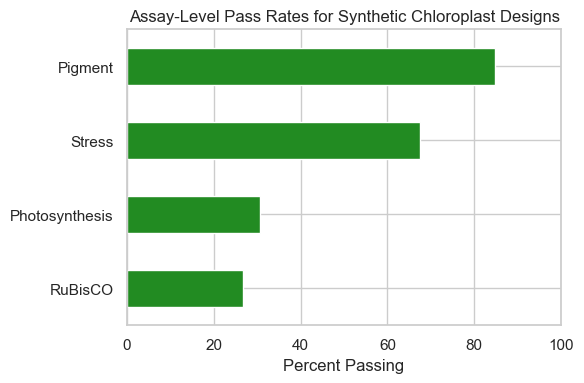

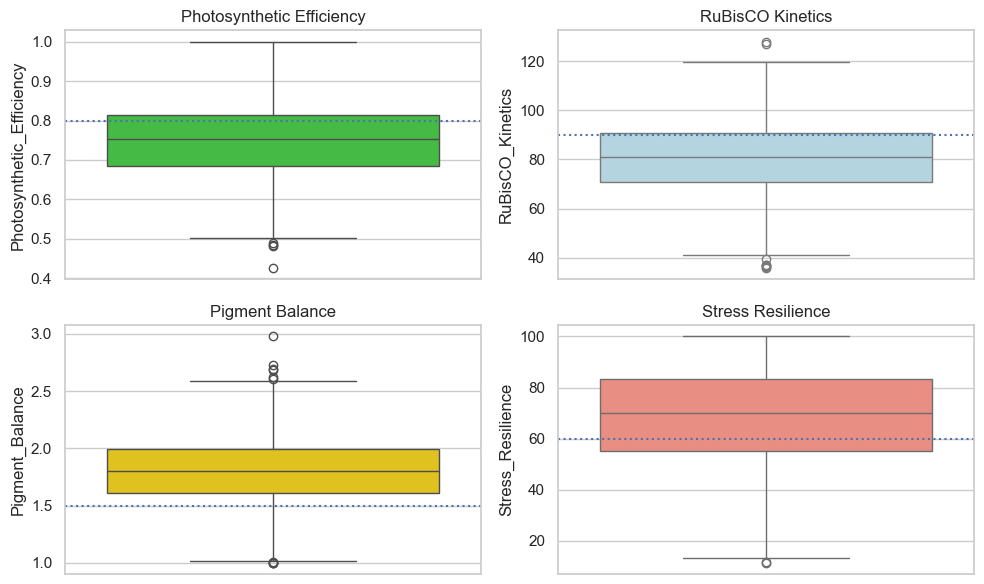


Top 20 Synthetic Chloroplast Designs:


,Variant_ID,Photosynthetic_Efficiency,RuBisCO_Kinetics,Pigment_Balance,Stress_Resilience,Performance_Score
0,CHL_625,0.909319,108.099467,1.922929,100.000000,0.810918
1,CHL_708,0.925479,108.498229,1.807171,97.044054,0.804732
2,CHL_210,1.000000,106.243651,1.799787,79.024506,0.792624
4,CHL_496,0.803891,110.091393,2.043962,100.000000,0.761238
5,CHL_876,0.929456,100.935257,1.527095,93.837987,0.756317
10,CHL_313,0.832542,100.853113,1.869021,100.000000,0.740334
13,CHL_186,0.821400,94.111568,2.260030,96.611498,0.735314
17,CHL_216,0.825897,98.716131,1.879763,100.000000,0.731291
18,CHL_240,0.835243,104.425949,2.005896,88.758311,0.730345
19,CHL_297,0.839960,93.786147,1.925519,100.000000,0.729938


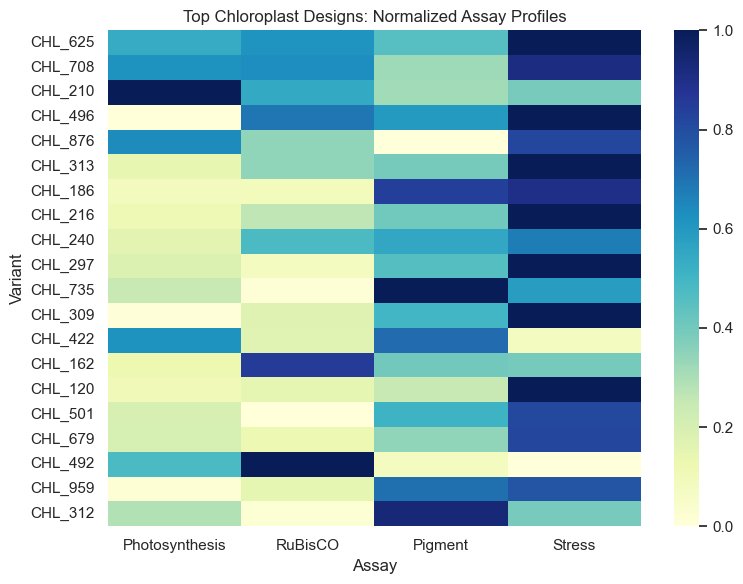

Report saved to: chloroplast_test_top_designs.csv


In [43]:
# 1. IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")
np.random.seed(42)

# 2. SIMULATE SYNTHETIC CHLOROPLAST GENOME DATA
n_variants = 1000

data_chloro = pd.DataFrame({
    "Variant_ID": [f"CHL_{i+1}" for i in range(n_variants)],
    "Photosynthetic_Efficiency": np.random.normal(loc=0.75, scale=0.1, size=n_variants),
    "RuBisCO_Kinetics": np.random.normal(loc=80, scale=15, size=n_variants),
    "Pigment_Balance": np.random.normal(loc=1.8, scale=0.3, size=n_variants),
    "Stress_Resilience": np.random.normal(loc=70, scale=20, size=n_variants)
})

# Clamp values within realistic ranges
data_chloro["Photosynthetic_Efficiency"] = np.clip(data_chloro["Photosynthetic_Efficiency"], 0.3, 1.0)
data_chloro["RuBisCO_Kinetics"] = np.clip(data_chloro["RuBisCO_Kinetics"], 20, 150)
data_chloro["Pigment_Balance"] = np.clip(data_chloro["Pigment_Balance"], 1.0, 3.0)
data_chloro["Stress_Resilience"] = np.clip(data_chloro["Stress_Resilience"], 0, 100)

# 3. CALCULATE PERFORMANCE SCORE
scaler_chloro = MinMaxScaler()
scaled_chloro = scaler_chloro.fit_transform(data_chloro[["Photosynthetic_Efficiency", "RuBisCO_Kinetics", "Pigment_Balance", "Stress_Resilience"]])
data_chloro[["PE_scaled", "RuBisCO_scaled", "PB_scaled", "SR_scaled"]] = scaled_chloro

# Assign weights: prioritize photosynthesis + stress tolerance
weights_chloro = np.array([0.35, 0.25, 0.15, 0.25])
data_chloro["Performance_Score"] = scaled_chloro.dot(weights_chloro)
data_chloro = data_chloro.sort_values("Performance_Score", ascending=False).reset_index(drop=True)

# 4. THRESHOLDS FOR PASS/FAIL CLASSIFICATION
THRESHOLDS_CHLORO = {
    "Photosynthetic_Efficiency_min": 0.8,
    "RuBisCO_Kinetics_min": 90.0,
    "Pigment_Balance_min": 1.5,
    "Stress_Resilience_min": 60.0
}

data_chloro["PASS_PE"] = data_chloro["Photosynthetic_Efficiency"] >= THRESHOLDS_CHLORO["Photosynthetic_Efficiency_min"]
data_chloro["PASS_RuBisCO"] = data_chloro["RuBisCO_Kinetics"] >= THRESHOLDS_CHLORO["RuBisCO_Kinetics_min"]
data_chloro["PASS_PB"] = data_chloro["Pigment_Balance"] >= THRESHOLDS_CHLORO["Pigment_Balance_min"]
data_chloro["PASS_SR"] = data_chloro["Stress_Resilience"] >= THRESHOLDS_CHLORO["Stress_Resilience_min"]
data_chloro["OVERALL_PASS"] = data_chloro[["PASS_PE","PASS_RuBisCO","PASS_PB","PASS_SR"]].all(axis=1)

# 5. DASHBOARD KPIs
n_total = len(data_chloro)
n_pass = int(data_chloro["OVERALL_PASS"].sum())
pass_pct = 100.0 * n_pass / n_total
print("\nCHLOROPLAST DASHBOARD SUMMARY:")
print(f"Total designs screened: {n_total}")
print(f"Designs meeting thresholds: {n_pass} ({pass_pct:.1f}%)")

# 6. VISUALIZE PASS RATES
metric_pass_rates = pd.Series({
    "Photosynthesis": data_chloro["PASS_PE"].mean()*100,
    "RuBisCO": data_chloro["PASS_RuBisCO"].mean()*100,
    "Pigment": data_chloro["PASS_PB"].mean()*100,
    "Stress": data_chloro["PASS_SR"].mean()*100
})
plt.figure(figsize=(6,4))
metric_pass_rates.sort_values().plot(kind="barh", color="forestgreen")
plt.xlabel("Percent Passing")
plt.title("Assay-Level Pass Rates for Synthetic Chloroplast Designs")
plt.xlim(0,100)
plt.tight_layout()
plt.show()

# 7. VISUAL QC BOXES
fig, axes = plt.subplots(2,2, figsize=(10,6))
sns.boxplot(y=data_chloro["Photosynthetic_Efficiency"], ax=axes[0,0], color="limegreen")
axes[0,0].axhline(THRESHOLDS_CHLORO["Photosynthetic_Efficiency_min"], linestyle=":")
axes[0,0].set_title("Photosynthetic Efficiency")

sns.boxplot(y=data_chloro["RuBisCO_Kinetics"], ax=axes[0,1], color="lightblue")
axes[0,1].axhline(THRESHOLDS_CHLORO["RuBisCO_Kinetics_min"], linestyle=":")
axes[0,1].set_title("RuBisCO Kinetics")

sns.boxplot(y=data_chloro["Pigment_Balance"], ax=axes[1,0], color="gold")
axes[1,0].axhline(THRESHOLDS_CHLORO["Pigment_Balance_min"], linestyle=":")
axes[1,0].set_title("Pigment Balance")

sns.boxplot(y=data_chloro["Stress_Resilience"], ax=axes[1,1], color="salmon")
axes[1,1].axhline(THRESHOLDS_CHLORO["Stress_Resilience_min"], linestyle=":")
axes[1,1].set_title("Stress Resilience")

plt.tight_layout()
plt.show()

# 8. TOP PERFORMING DESIGNS
passing_chloro = data_chloro[data_chloro["OVERALL_PASS"]].copy()
passing_top_chloro = passing_chloro.sort_values("Performance_Score", ascending=False).head(20)

print("\nTop 20 Synthetic Chloroplast Designs:")
display(passing_top_chloro[["Variant_ID", "Photosynthetic_Efficiency", "RuBisCO_Kinetics", "Pigment_Balance", "Stress_Resilience", "Performance_Score"]])

# Heatmap for top designs
norm_cols_chloro = ["Photosynthetic_Efficiency", "RuBisCO_Kinetics", "Pigment_Balance", "Stress_Resilience"]
pass_norm_chloro = MinMaxScaler().fit_transform(passing_top_chloro[norm_cols_chloro])
pass_norm_df_chloro = pd.DataFrame(pass_norm_chloro, columns=["Photosynthesis", "RuBisCO", "Pigment", "Stress"], index=passing_top_chloro["Variant_ID"])
plt.figure(figsize=(8,6))
sns.heatmap(pass_norm_df_chloro, cmap="YlGnBu", annot=False)
plt.title("Top Chloroplast Designs: Normalized Assay Profiles")
plt.ylabel("Variant")
plt.xlabel("Assay")
plt.tight_layout()
plt.show()

# Save report
report_path_chloro = "chloroplast_test_top_designs.csv"
passing_top_chloro[["Variant_ID", "Photosynthetic_Efficiency", "RuBisCO_Kinetics", "Pigment_Balance", "Stress_Resilience", "Performance_Score", "OVERALL_PASS"]].to_csv(report_path_chloro, index=False)
print(f"Report saved to: {report_path_chloro}")